### Import Dependencies

In [6]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [49]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Input Dataset

In [50]:
df = pd.read_csv('flower.csv')

## Data Exploration

### Check data rows

In [51]:
y = df['Species']
df.head(10)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Id
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,2
2,4.7,3.2,1.3,0.2,0,3
3,4.6,3.1,1.5,0.2,0,4
4,5.0,3.6,1.4,0.2,0,5
5,5.4,3.9,1.7,0.4,0,6
6,4.6,3.4,1.4,0.3,0,7
7,5.0,3.4,1.5,0.2,0,8
8,4.4,2.9,1.4,0.2,0,9
9,4.9,3.1,1.5,0.1,0,10


### Describe data

In [52]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Id
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000,75.500000
std,0.828066,0.433594,1.764420,0.763161,0.819232,43.445368
min,4.300000,2.000000,1.000000,0.100000,0.000000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,38.250000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,75.500000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,112.750000
max,7.900000,4.400000,6.900000,2.500000,2.000000,150.000000


<Axes: xlabel='Species', ylabel='count'>

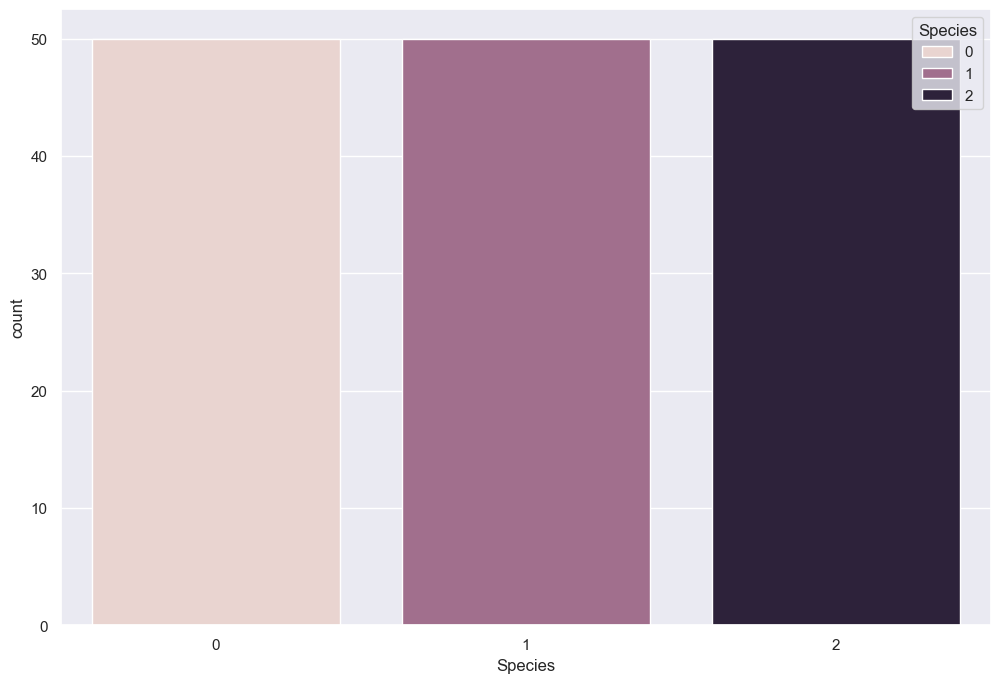

In [53]:
sns.countplot (x='Species', data=df, hue="Species")

## Boxplot of the species to find the outliers if any

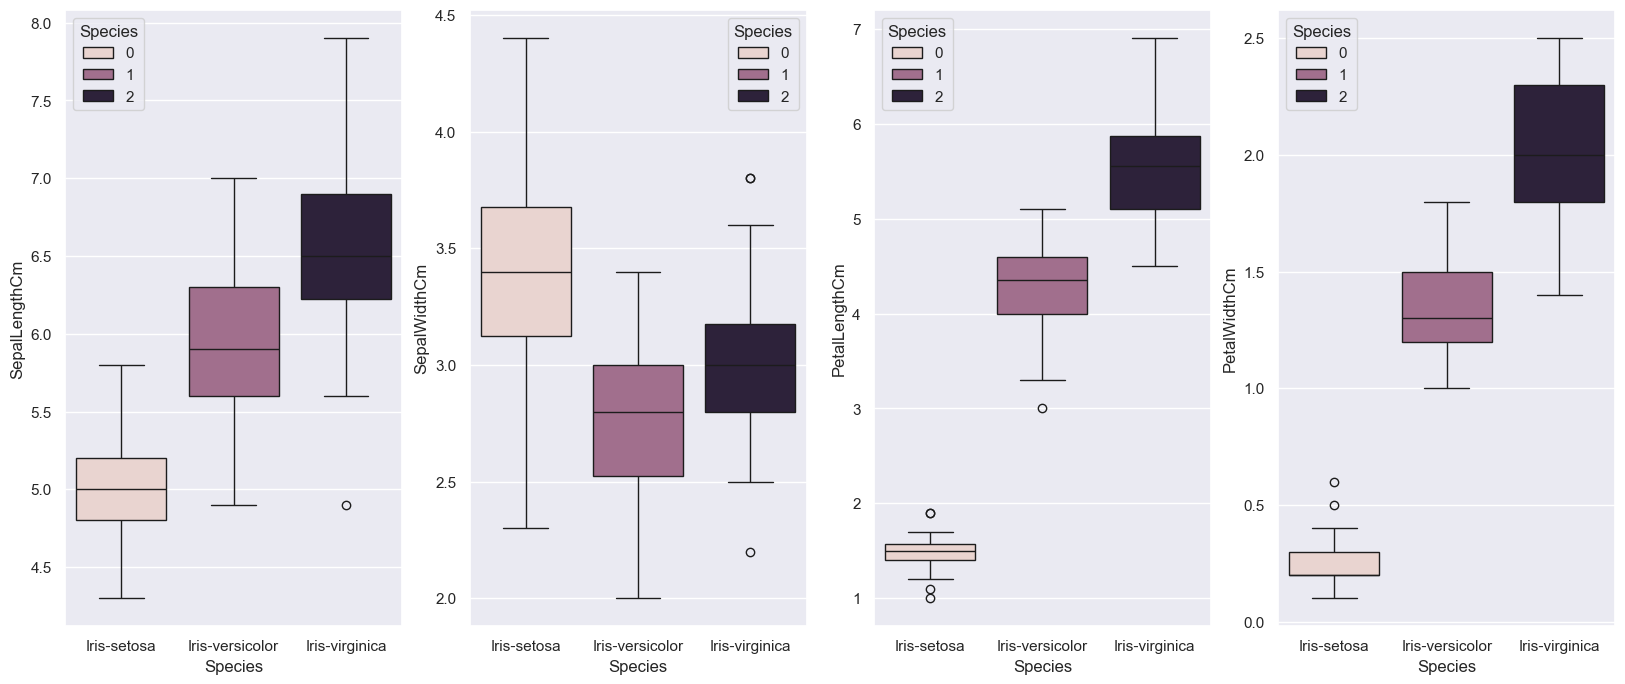

In [54]:
plt.figure(1,figsize=(20,8))
plt.subplot(141)
sns.boxplot(x='Species',y='SepalLengthCm',data=df, hue='Species')
plt.xticks(ticks=[0, 1, 2], labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
plt.subplot(142)
sns.boxplot(x='Species',y='SepalWidthCm',data=df, hue='Species')
plt.xticks(ticks=[0, 1, 2], labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
plt.subplot(143)
sns.boxplot(x='Species',y='PetalLengthCm',data=df, hue='Species')
plt.xticks(ticks=[0, 1, 2], labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
plt.subplot(144)
sns.boxplot(x='Species',y='PetalWidthCm',data=df, hue='Species')
plt.xticks(ticks=[0, 1, 2], labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

plt.show()



## Plotting of the Correlation Matrix

In [55]:
df.corr(numeric_only=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Id
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561,0.716676
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446,-0.397729
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043,0.882747
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464,0.899759
Species,0.782561,-0.419446,0.949043,0.956464,1.000000,0.942830
Id,0.716676,-0.397729,0.882747,0.899759,0.942830,1.000000


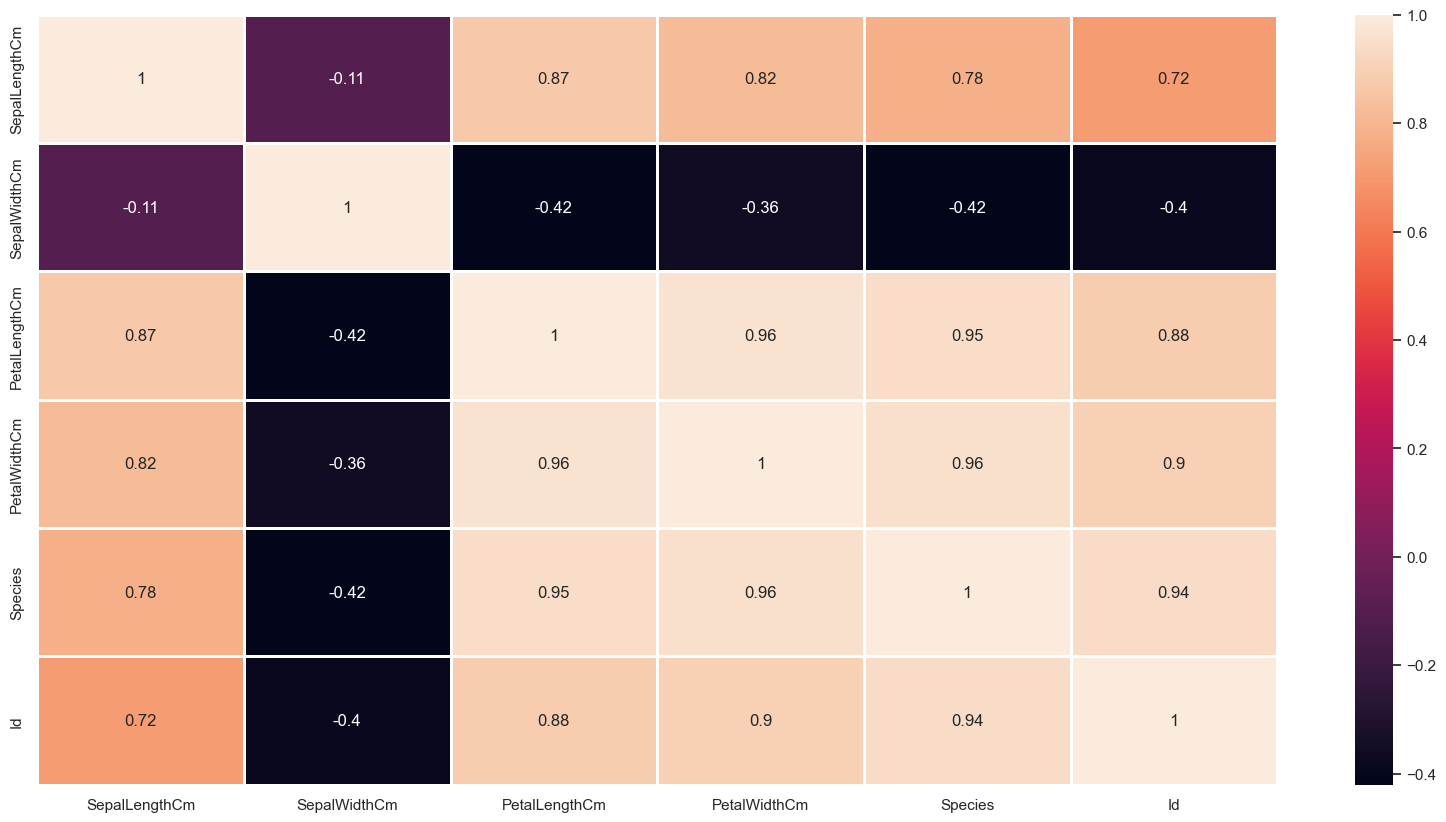

In [56]:
plt.figure(1,figsize=(20,10))
sns.color_palette("magma", as_cmap=True)
sns.heatmap(df.corr(numeric_only=True),annot=True, linewidth=0.8)
plt.show()

In [61]:
X = df.iloc[:,0:7]
target = df['Species'].to_numpy()
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species', 'Id']


## PCA Plotting

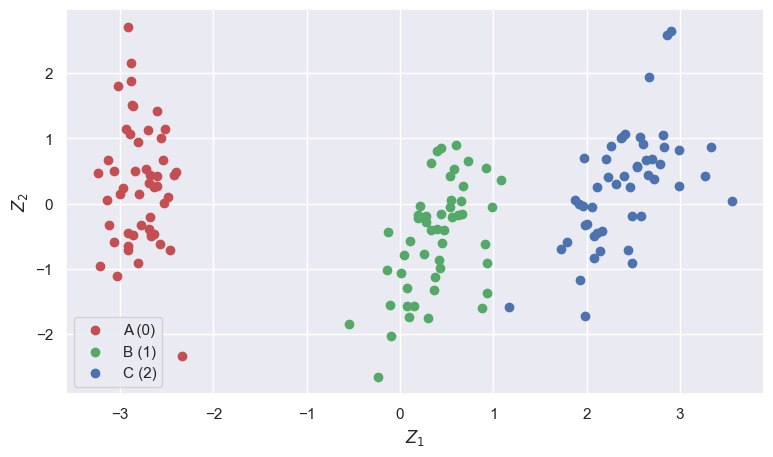

In [58]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(A)->0,  2(P)->1, 3(C)->2
idx_A = np.where(y == 0)
idx_B = np.where(y == 1)
idx_C = np.where(y == 2)

plt.figure(1, figsize=(9,5))
plt.scatter(Z[idx_A,0], Z[idx_A,1], c='r', label='A (0)')
plt.scatter(Z[idx_B,0], Z[idx_B,1], c='g', label='B (1)')
plt.scatter(Z[idx_C,0], Z[idx_C,1], c='b', label='C (2)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

labels = ['red' if i==1 else 'green' for i in df.Species]


# Eigenvector Matrix

In [59]:
A = pca.components_.T
print(f'Eigenvector matrix:\n{A}')



Eigenvector matrix:
[[ 0.39430051  0.38549168  0.68507478 -0.39557776  0.00772179  0.26467797]
 [-0.20560332  0.91872993 -0.29963196  0.09335891  0.03603068 -0.11776749]
 [ 0.45500577  0.03322082  0.19285024  0.26650247 -0.03723742 -0.82599317]
 [ 0.44991885  0.07575441 -0.11781675  0.60287127 -0.47082195  0.43912008]
 [ 0.45238061 -0.00712407 -0.27056797  0.11597434  0.82097079  0.18614759]
 [ 0.43376139 -0.02093743 -0.56268481 -0.62199274 -0.31873061 -0.07958833]]


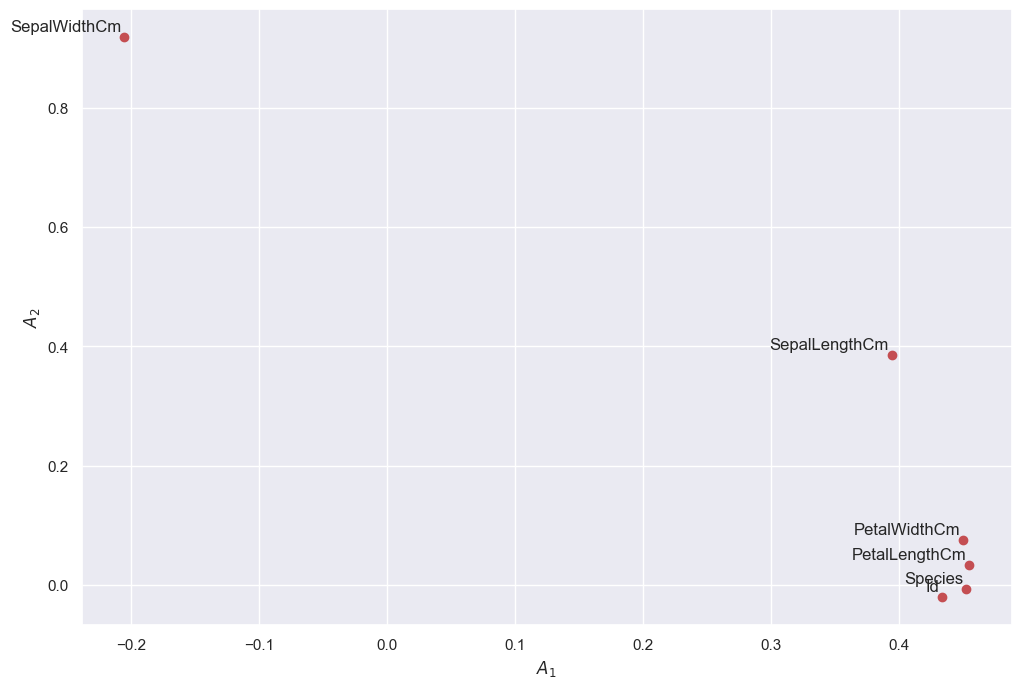

In [62]:
plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

# Eigen Values & Scree Plot

Eigenvalues:
[4.71398496 0.92800811 0.256567   0.08997135 0.03154858 0.02018845]


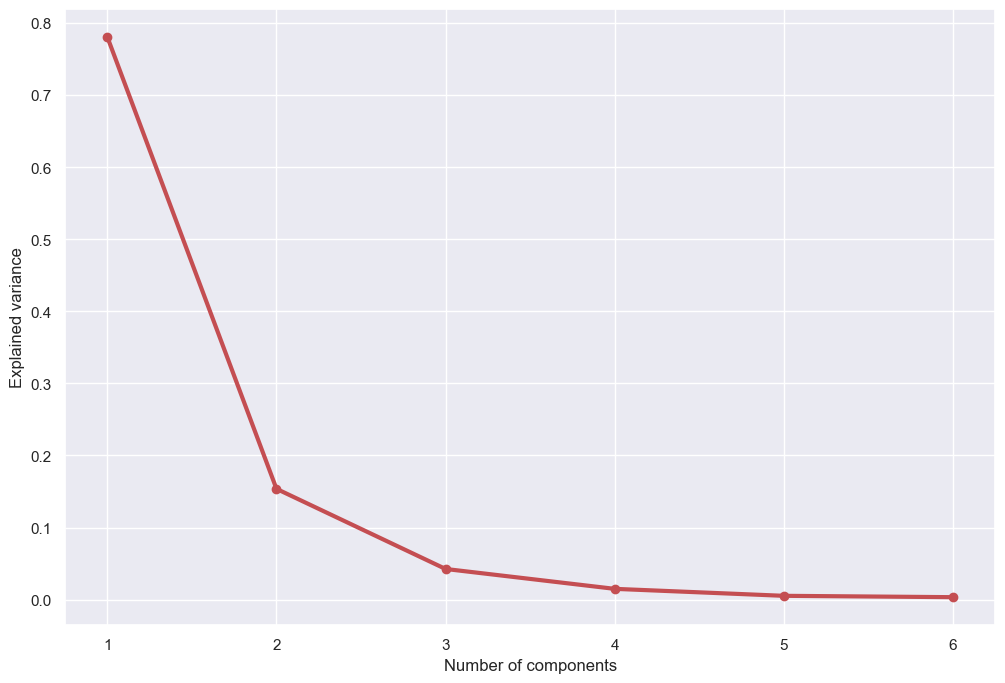

In [42]:

#Eigenvalues
Lambda = pca.explained_variance_ 
print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()


# Pareto Plot

In [64]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (78.0%)',
 '1': 'PC 2 (15.4%)',
 '2': 'PC 3 (4.2%)',
 '3': 'PC 4 (1.5%)',
 '4': 'PC 5 (0.5%)',
 '5': 'PC 6 (0.3%)'}

Text(0, 0.5, 'Cumulative explained variance')

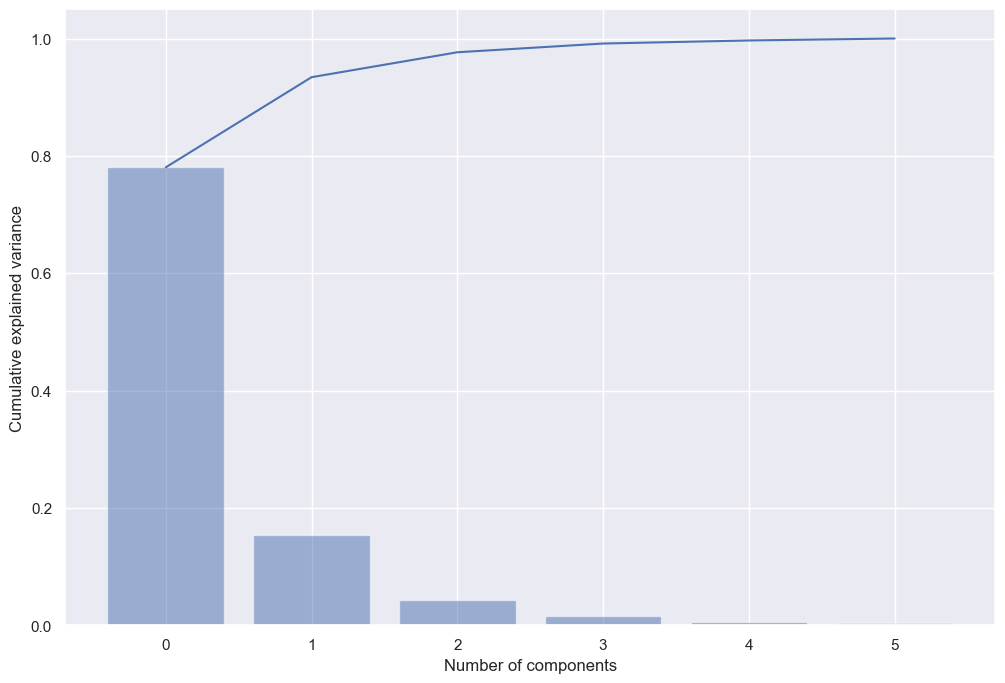

In [63]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

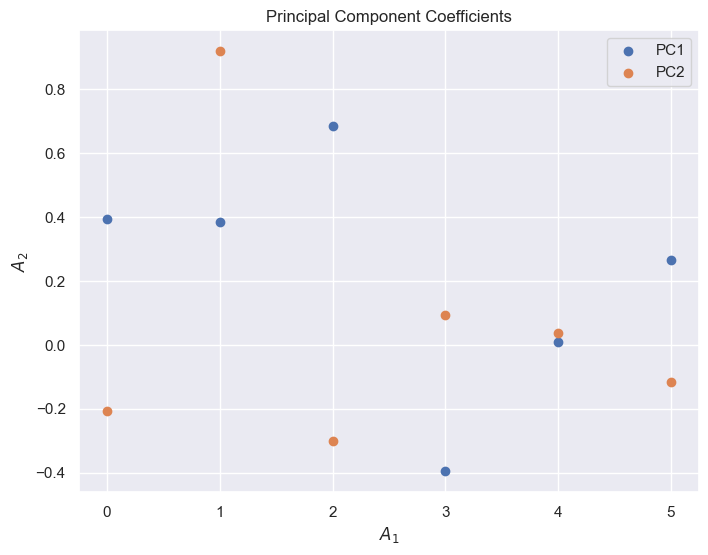

In [104]:


# Define the principal component coefficients
pc_coefficients = np.array(A)

# Plot the principal component coefficients
plt.figure(figsize=(8, 6))
for i in range(2):
    plt.scatter(range(pc_coefficients.shape[1]), pc_coefficients[i], label=f'PC{i+1}')

plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
plt.title('Principal Component Coefficients')
plt.legend()
plt.grid(True)
plt.show()

